<a href="https://colab.research.google.com/github/elifsare/Mean-Reversion-Strategy/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

In [ ]:
def get_historical_Data(tickers):
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2020, 10, 27), end=datetime(2023, 3, 9)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ['CPER', 'TLT', 'TTT', 'UUP', 'VXX']
d = get_historical_Data(ticks)
print(d.shape)
d.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
(594, 5)


,CPER,TLT,TTT,UUP,VXX
Date,,,,,
2023-03-02,24.809999,99.228424,75.400803,28.420000,44.880001
2023-03-03,24.850000,101.632332,70.000801,28.309999,43.599998
2023-03-06,24.870001,100.844330,71.465378,28.270000,42.840000
2023-03-07,24.230000,101.462761,70.359474,28.620001,43.770000
2023-03-08,24.540001,101.562508,69.990837,28.610001,43.049999


In [ ]:
corr_matrix = d.corr()
corr_matrix

,CPER,TLT,TTT,UUP,VXX
CPER,1.000000,0.299002,-0.398261,-0.463216,-0.289547
TLT,0.299002,1.000000,-0.969686,-0.909962,0.609876
TTT,-0.398261,-0.969686,1.000000,0.886151,-0.498658
UUP,-0.463216,-0.909962,0.886151,1.000000,-0.603102
VXX,-0.289547,0.609876,-0.498658,-0.603102,1.000000


<Axes: >

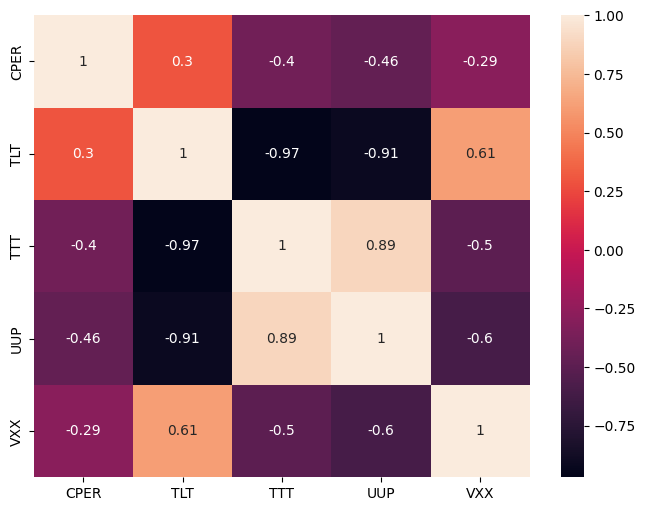

In [ ]:
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
sn.heatmap(corr_matrix, annot = True)

In [ ]:
# TLT ve UUP arasında ilişki en yüksek değerde(0.89). Bu ikisini grafikte gözlemleyelim:

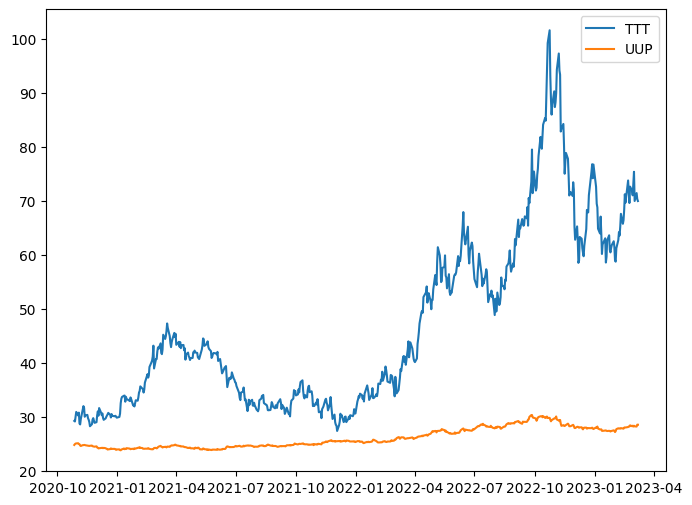

In [ ]:
import matplotlib.pyplot as plt

figure(figsize=(8, 6), dpi=100)

TTT = d['TTT']
UUP = d['UUP']

plt.plot(TTT, label = "TTT")
plt.plot(UUP, label = "UUP")
plt.legend()

Text(0.5, 1.0, 'Spread between TTT and UUP')

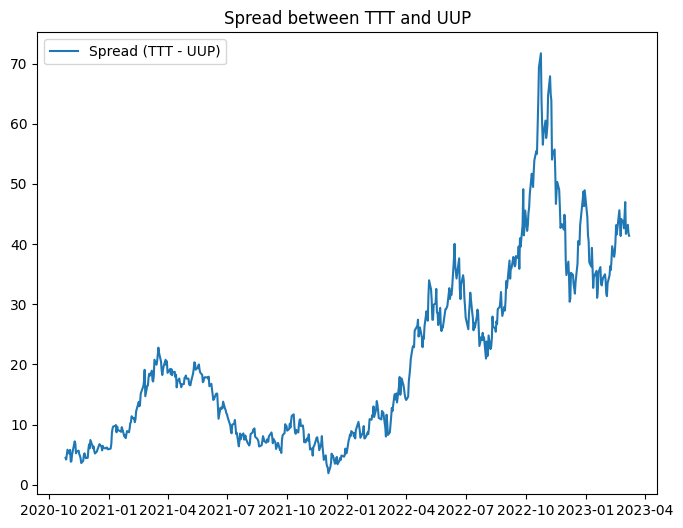

In [ ]:
figure(figsize=(8, 6), dpi=100)
plt.plot(TTT - UUP, label = 'Spread (TTT - UUP)')
plt.legend()
plt.title("Spread between TTT and UUP")

In [ ]:
import statsmodels.tsa.stattools as ts
result = ts.coint(TTT, UUP)

In [ ]:
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
# P val < 0.05 istiyoruz (eşbütünleşmenin var olduğu anlamına gelir)
print('P value', p_val)

P value 0.1423500338142461


In [ ]:
from statsmodels.tsa.stattools import adfuller

TTT_ADF = adfuller(TTT)
print('P value for the Augmented Dickey-Fuller Test is', TTT_ADF[1])

UUP_ADF = adfuller(UUP)
print('P value for the Augmented Dickey-Fuller Test is', TTT_ADF[1])

Spread_ADF = adfuller(TTT - UUP)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])

Ratio_ADF = adfuller(TTT / UUP)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])

#Sonuçlar: Spread_ADF ve VXX_ADF için durağan olduğunu iddia edebilir (çünkü P değeri < 0,05).

P value for the Augmented Dickey-Fuller Test is 0.6643734834489705
P value for the Augmented Dickey-Fuller Test is 0.6643734834489705
P value for the Augmented Dickey-Fuller Test is 0.703672350075278
P value for the Augmented Dickey-Fuller Test is 0.6550551877247668


Text(0.5, 1.0, 'Price Ratio between TTT and UUP')

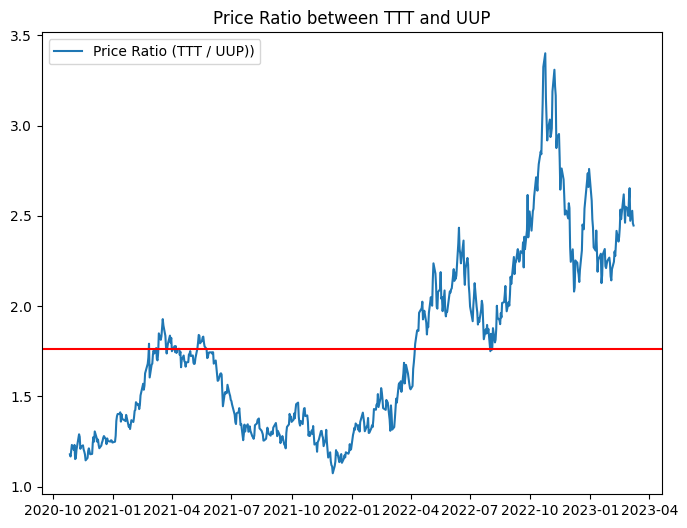

In [ ]:
figure(figsize=(8, 6), dpi=100)
ratio = TTT / UUP
plt.plot(ratio, label = 'Price Ratio (TTT / UUP))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between TTT and UUP")

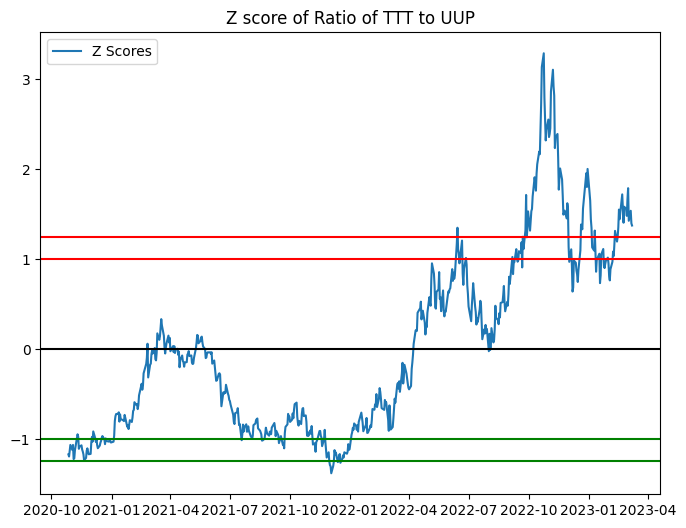

In [ ]:

figure(figsize=(8, 6), dpi=100)

df_zscore = (ratio - ratio.mean())/ratio.std()

plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red')
plt.axhline(1.25, color='red')
plt.axhline(-1.0, color='green')
plt.axhline(-1.25, color='green')
plt.legend(loc = 'best')
plt.title('Z score of Ratio of TTT to UUP')

plt.show()

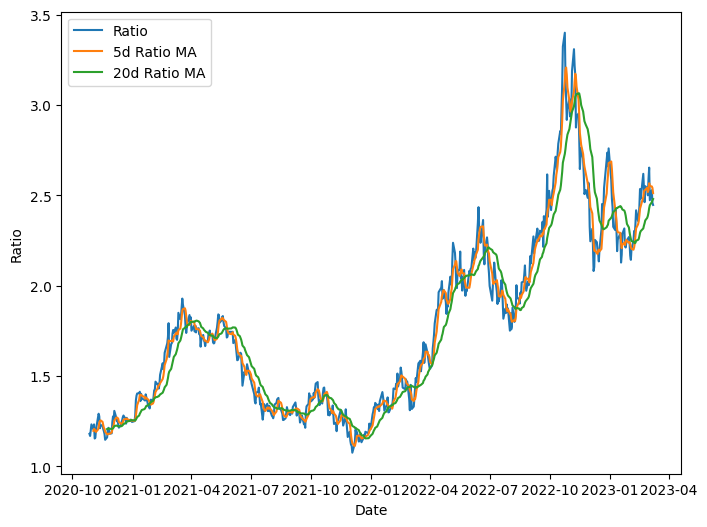

In [ ]:
figure(figsize=(8, 6), dpi=100)

ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()

std_20 = ratio.rolling(window=20, center=False).std()

zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20

plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.show()

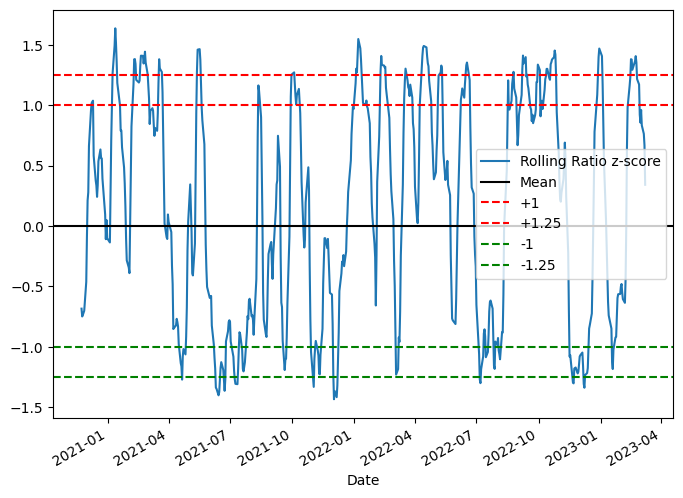

In [ ]:
figure(figsize=(8, 6), dpi=100)

zscore_20_5.plot()

plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])

plt.show()

# Çizgilerin dışında olduğu zamanlarda alım stım için karar???

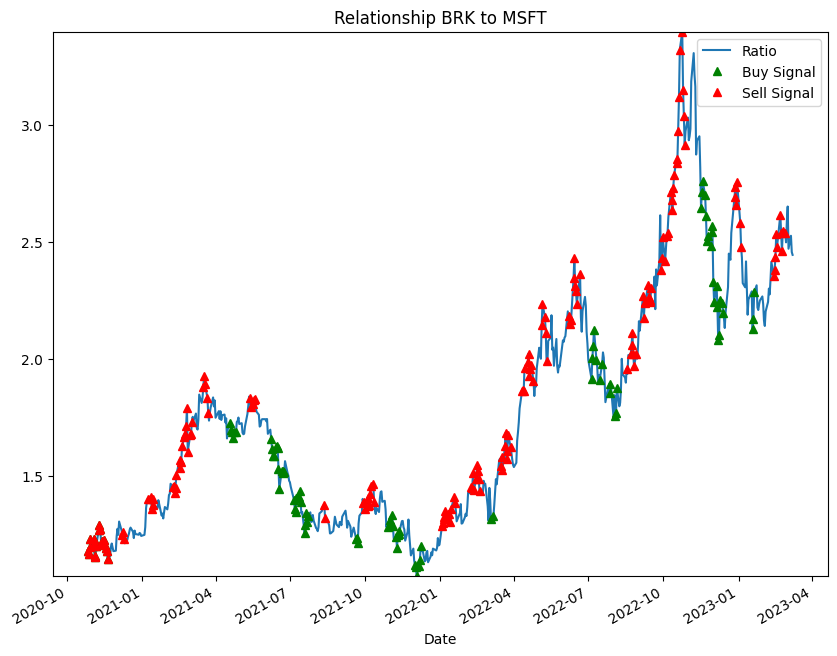

In [ ]:
figure(figsize=(8, 6), dpi=100)

ratio.plot()

buy = ratio.copy()
sell = ratio.copy()

buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0

buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))

plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship BRK to MSFT')

plt.show()